In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

adata = sc.read('/dfs/project/perturb-gnn/datasets/Adamson2016_hvg+perts_more_de_in_genes.h5ad')

In [2]:
genename2ensembl = dict(zip(adata.var.gene_name.values, adata.var.index.values))
ensembl2genename = dict(zip(adata.var.index.values, adata.var.gene_name.values))

In [3]:
' '.join(adata.var.index.values)

'ENSG00000228463 ENSG00000272438 ENSG00000230699 ENSG00000223764 ENSG00000187634 ENSG00000188290 ENSG00000187608 ENSG00000162571 ENSG00000186891 ENSG00000186827 ENSG00000078808 ENSG00000221978 ENSG00000272455 ENSG00000215915 ENSG00000272106 ENSG00000197530 ENSG00000189409 ENSG00000169885 ENSG00000271806 ENSG00000182873 ENSG00000269554 ENSG00000272449 ENSG00000157873 ENSG00000238260 ENSG00000235169 ENSG00000236423 ENSG00000187017 ENSG00000049249 ENSG00000116285 ENSG00000142599 ENSG00000074800 ENSG00000049239 ENSG00000178585 ENSG00000054523 ENSG00000271895 ENSG00000226849 ENSG00000132879 ENSG00000177000 ENSG00000171729 ENSG00000142634 ENSG00000142615 ENSG00000237301 ENSG00000162461 ENSG00000162458 ENSG00000179743 ENSG00000065526 ENSG00000173641 ENSG00000142627 ENSG00000157191 ENSG00000261135 ENSG00000219481 ENSG00000227751 ENSG00000117148 ENSG00000230424 ENSG00000270136 ENSG00000162542 ENSG00000187980 ENSG00000225986 ENSG00000117242 ENSG00000244038 ENSG00000127483 ENSG00000075151 ENSG000

In [4]:
df_gene2go = pd.read_csv('ensembl_go_adamson.tab', sep = '\t')
df_gene2go['Entry name'] = df_gene2go['Entry name'].apply(lambda x: x.split('_')[0])

In [5]:
len(np.intersect1d(df_gene2go['Entry name'].values, np.unique(adata.var.gene_name.values)))

1723

In [7]:
df_gene2go = df_gene2go[df_gene2go['Gene ontology IDs'].notnull()]
df_gene2go = df_gene2go.rename(columns = {'yourlist:M202111095BF3C56A578D7D6DFD1FC81EE5DA77302B19451': 'gene_id'})

In [8]:
geneid2go = dict(df_gene2go[['gene_id', 'Gene ontology IDs']].values)

In [9]:
len(np.intersect1d(df_gene2go.gene_id.unique(),adata.var.index.values))

3623

In [12]:
gene2go = {}
for i,j in geneid2go.items():
    j = [k.strip() for k in j.split(';')]
    for k in i.split(','):
        gene2go[ensembl2genename[k]] = j

In [13]:
len(gene2go)

3627

In [14]:
unique_perturbs = []
for i in adata.obs.condition.unique():
    if '+' in i:
        unique_perturbs.append(i.split('+')[0])
        unique_perturbs.append(i.split('+')[1])

In [15]:
unique_perturbs = np.unique(unique_perturbs)

In [16]:
len(unique_perturbs)

87

In [17]:
len(np.intersect1d(list(gene2go.keys()), unique_perturbs))

85

In [18]:
np.setdiff1d(unique_perturbs, list(gene2go.keys()))

array(['TIMM23', 'ctrl'], dtype='<U8')

In [19]:
gene2go

{'SAMD11': ['GO:0003682', 'GO:0005634', 'GO:0042393', 'GO:0045892'],
 'HES4': ['GO:0000785',
  'GO:0000978',
  'GO:0000981',
  'GO:0005634',
  'GO:0006357',
  'GO:0007399',
  'GO:0008134',
  'GO:0009952',
  'GO:0030154',
  'GO:0046983'],
 'ISG15': ['GO:0005178',
  'GO:0005576',
  'GO:0005634',
  'GO:0005654',
  'GO:0005737',
  'GO:0005829',
  'GO:0007229',
  'GO:0009615',
  'GO:0016032',
  'GO:0019941',
  'GO:0019985',
  'GO:0022627',
  'GO:0030501',
  'GO:0031386',
  'GO:0031397',
  'GO:0031625',
  'GO:0032020',
  'GO:0032480',
  'GO:0032649',
  'GO:0032729',
  'GO:0032733',
  'GO:0034340',
  'GO:0042742',
  'GO:0045071',
  'GO:0045648',
  'GO:0051607',
  'GO:0060337',
  'GO:0060339'],
 'TTLL10': ['GO:0005524', 'GO:0005829', 'GO:0018094', 'GO:0018215'],
 'TNFRSF18': ['GO:0002687',
  'GO:0005031',
  'GO:0005576',
  'GO:0005886',
  'GO:0005887',
  'GO:0006915',
  'GO:0007165',
  'GO:0009897',
  'GO:0033209',
  'GO:0042531',
  'GO:0043066',
  'GO:0045589',
  'GO:0045785'],
 'TNFRSF4': ['

In [20]:
np.setdiff1d(adata.var.gene_name.values, list(gene2go.keys()))[:1000]

array(['7SK', 'AC000068.10', 'AC002117.1', 'AC002472.13', 'AC002480.3',
       'AC003092.1', 'AC003102.3', 'AC004067.5', 'AC004069.2',
       'AC004156.3', 'AC004381.7', 'AC004449.6', 'AC004463.6',
       'AC004466.1', 'AC004540.5', 'AC004840.9', 'AC004893.11',
       'AC004951.6', 'AC005003.1', 'AC005224.2', 'AC005540.3',
       'AC005546.2', 'AC005592.2', 'AC005616.1', 'AC005786.7',
       'AC005789.11', 'AC005932.1', 'AC005944.2', 'AC006262.5',
       'AC006547.15', 'AC006946.17', 'AC007038.7', 'AC007040.6',
       'AC007126.1', 'AC007228.11', 'AC007246.3', 'AC007292.3',
       'AC007308.6', 'AC007382.1', 'AC007383.3', 'AC007405.6',
       'AC007773.2', 'AC008074.3', 'AC008132.13', 'AC008174.3',
       'AC008267.1', 'AC008443.1', 'AC008746.12', 'AC008781.7',
       'AC009065.1', 'AC009473.1', 'AC009501.4', 'AC009506.1',
       'AC010226.4', 'AC010524.4', 'AC010525.7', 'AC010761.10',
       'AC010761.8', 'AC010883.5', 'AC010982.1', 'AC010983.1',
       'AC011298.2', 'AC011558.5', 'AC

In [21]:
from tqdm import tqdm
edge_list = []
for g1 in tqdm(gene2go.keys()):
    for g2 in gene2go.keys():
        edge_list.append((g1, g2, len(np.intersect1d(gene2go[g1], gene2go[g2]))/len(np.union1d(gene2go[g1], gene2go[g2]))))

100%|████████████████████████████████████████████████████████████████████████| 3627/3627 [12:23<00:00,  4.88it/s]


In [22]:
edge_list_filter = [i for i in edge_list if i[2] > 0]

In [23]:
len(edge_list_filter)

6238401

<AxesSubplot:ylabel='Density'>

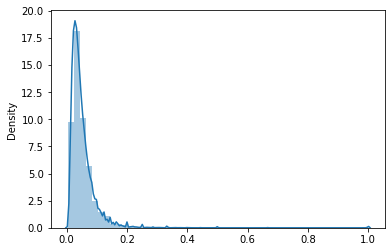

In [24]:
import seaborn as sns
sns.distplot([i[2] for i in edge_list_filter])

In [25]:
len([i for i in edge_list if i[2] > 0.1])

496381

In [26]:
further_filter = [i for i in edge_list if i[2] > 0.1]

<AxesSubplot:ylabel='Density'>

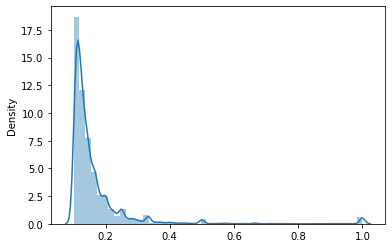

In [27]:
sns.distplot([i[2] for i in further_filter])

In [28]:
df_edge_list = pd.DataFrame(further_filter).rename(columns = {0: 'gene1', 1: 'gene2', 2: 'score'})

In [29]:
dict(df_edge_list.gene1.value_counts())

{'DEF6': 999,
 'WDR26': 949,
 'NUFIP2': 907,
 'ABHD14B': 894,
 'MOB1B': 838,
 'SEC14L2': 797,
 'CDCA4': 775,
 'ZNF34': 764,
 'PIR': 752,
 'S100A16': 748,
 'KIAA0907': 743,
 'POMP': 726,
 'SPATS2L': 721,
 'IRF2BP2': 696,
 'ARID4B': 653,
 'PPIL4': 649,
 'HSPA4L': 637,
 'TTC3': 632,
 'GRAP2': 628,
 'GMEB1': 623,
 'RANBP10': 608,
 'HSPA12A': 601,
 'FILIP1L': 599,
 'CDCA7': 596,
 'USP12': 593,
 'CCNDBP1': 588,
 'MIDN': 586,
 'KLF6': 585,
 'HIVEP1': 584,
 'SENP6': 576,
 'ZNF638': 570,
 'SP110': 568,
 'IRF9': 567,
 'ADAP1': 565,
 'IER2': 562,
 'YAF2': 560,
 'GTF2IRD2B': 560,
 'HERC2': 555,
 'GYPA': 551,
 'EDF1': 549,
 'ZNF789': 548,
 'RPAP2': 548,
 'FUBP1': 545,
 'HIST1H2BD': 545,
 'PTMA': 543,
 'DMTF1': 542,
 'CHD1': 542,
 'ZNF594': 540,
 'IER5': 539,
 'CDK15': 537,
 'BRWD1': 536,
 'TP53TG3C': 536,
 'NECAB1': 533,
 'SH3BGRL': 533,
 'MCC': 532,
 'ETS2': 531,
 'ASCC3': 530,
 'MBNL1': 529,
 'ZNF672': 528,
 'NFATC2IP': 526,
 'FAM46C': 526,
 'ZNF470': 526,
 'ARL4A': 526,
 'NXF1': 525,
 'UBA7': 52

In [30]:
df_edge_list.to_csv('gene_sim_jc_filter_adamson.csv', index = False)

In [31]:
len(df_edge_list.gene1.unique())

3627

In [32]:
df_edge_list_all = pd.DataFrame(edge_list_filter).rename(columns = {0: 'gene1', 1: 'gene2', 2: 'score'})


In [33]:
df_knn = df_edge_list_all.groupby('gene2').apply(lambda x: x.nlargest(11,['score'])).reset_index(drop = True)

<AxesSubplot:ylabel='Density'>

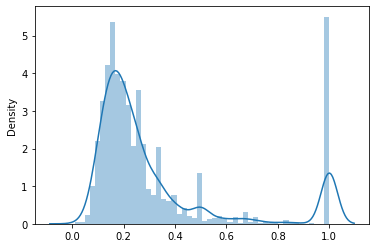

In [34]:
sns.distplot(df_knn.score.values)

In [35]:
df_knn.gene2.value_counts()

AAK1        11
PSMB9       11
PRKDC       11
PRKX        11
PROC        11
            ..
C9orf64      4
MEI1         3
C10orf11     3
ANKRD36C     2
FAM122C      2
Name: gene2, Length: 3627, dtype: int64

In [36]:
df_knn.to_csv('gene_sim_knn_adamson.csv', index = False)

In [37]:
df_knn

,gene1,gene2,score
0,AAK1,AAK1,1.000000
1,BMP2K,AAK1,0.360000
2,PIM3,AAK1,0.307692
3,CDK15,AAK1,0.269231
4,PIM2,AAK1,0.266667
...,...,...,...
39839,PPFIA1,ZYX,0.200000
39840,S100A16,ZYX,0.185185
39841,CDC42EP3,ZYX,0.185185
39842,ADAP1,ZYX,0.185185
